Original Data (Large Numbers):
 [[ 100  200]
 [ 300  400]
 [ 500  600]
 [ 700  800]
 [ 900 1000]
 [1100 1200]
 [1300 1400]
 [1500 1600]
 [1700 1800]
 [1900 2000]]

Reduced Data (1D) (Large Numbers):
 [[-1272.79220614]
 [ -989.94949366]
 [ -707.10678119]
 [ -424.26406871]
 [ -141.42135624]
 [  141.42135624]
 [  424.26406871]
 [  707.10678119]
 [  989.94949366]
 [ 1272.79220614]]

Reconstructed Data from 1D (Large Numbers):
 [[ 100.  200.]
 [ 300.  400.]
 [ 500.  600.]
 [ 700.  800.]
 [ 900. 1000.]
 [1100. 1200.]
 [1300. 1400.]
 [1500. 1600.]
 [1700. 1800.]
 [1900. 2000.]]


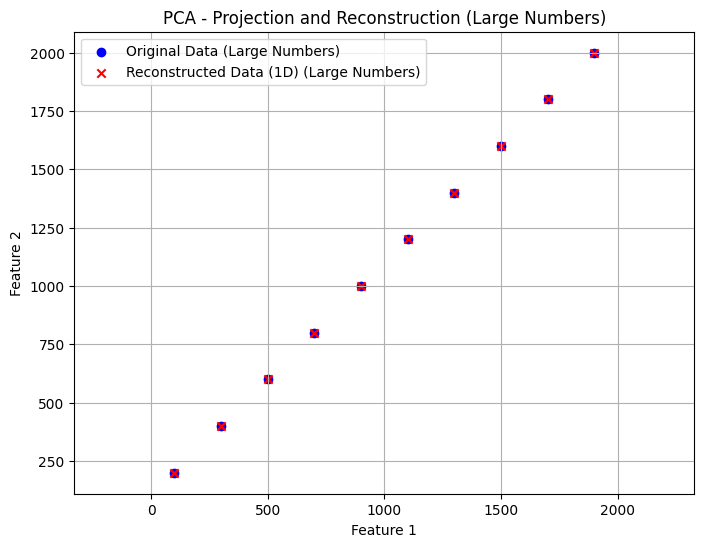

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 0: Sample dataset with larger numbers
X_large = np.array([
    [100, 200],
    [300, 400],
    [500, 600],
    [700, 800],
    [900, 1000],
    [1100, 1200],
    [1300, 1400],
    [1500, 1600],
    [1700, 1800],
    [1900, 2000]
])

# Step 1: Mean center the data
mu_large = np.mean(X_large, axis=0)
X_centered_large = X_large - mu_large

# Step 2: Compute covariance matrix
cov_matrix_large = np.cov(X_centered_large.T)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues_large, eigenvectors_large = np.linalg.eig(cov_matrix_large)

# Step 4: Sort eigenvalues and corresponding eigenvectors
sorted_idx_large = np.argsort(eigenvalues_large)[::-1]
eigenvalues_large = eigenvalues_large[sorted_idx_large]
eigenvectors_large = eigenvectors_large[:, sorted_idx_large]

# Step 5: Reduce dimensionality (choose k = 1)
k_large = 1
W_large = eigenvectors_large[:, :k_large]
X_reduced_large = X_centered_large.dot(W_large)

# Step 6: Optional - Reconstruct the original data
X_approx_large = X_reduced_large.dot(W_large.T) + mu_large

# Display results
print("Original Data (Large Numbers):\n", X_large)
print("\nReduced Data (1D) (Large Numbers):\n", X_reduced_large)
print("\nReconstructed Data from 1D (Large Numbers):\n", X_approx_large)

# Step 7: Plot original vs reconstructed
plt.figure(figsize=(8,6))
plt.scatter(X_large[:, 0], X_large[:, 1], label='Original Data (Large Numbers)', c='blue')
plt.scatter(X_approx_large[:, 0], X_approx_large[:, 1], label='Reconstructed Data (1D) (Large Numbers)', c='red', marker='x')
plt.title("PCA - Projection and Reconstruction (Large Numbers)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()